## Analysis on my chess games at [lichess.org](https://lichess.org)

I have played to this date around 7500 chess games on the aforesaid website. In this notebook I'll do some exploratory analysis of my games. First we need data; we can get it from [lichess api](https://lichess.org/api#operation/apiGamesUser). Data can be downloaded without authenticating but it is faster if you authenticate and use your own [api token](https://lichess.org/account/oauth/token) and add to your request header in following `curl` command with option `-H "Authorization: Bearer <your_token>"`. 

In [1]:
! [ ! -f games.txt ] && curl https://lichess.org/api/games/user/aitotumainen > games.txt
! head -22 games.txt

[Event "Rated Rapid game"]
[Site "https://lichess.org/oykful3u"]
[Date "2020.06.19"]
[Round "-"]
[White "martoj13"]
[Black "aitotumainen"]
[Result "1-0"]
[UTCDate "2020.06.19"]
[UTCTime "06:12:07"]
[WhiteElo "1920"]
[BlackElo "1919"]
[WhiteRatingDiff "+6"]
[BlackRatingDiff "-6"]
[Variant "Standard"]
[TimeControl "600+0"]
[ECO "B01"]
[Termination "Normal"]

1. e4 d5 2. e5 Nc6 3. Bb5 a6 4. Bxc6+ bxc6 5. d4 Bf5 6. Nd2 e6 7. c3 c5 8. Ne2 cxd4 9. Qa4+ Qd7 10. Qxd7+ Kxd7 11. cxd4 Bd3 12. Nf4 Bb5 13. a3 c5 14. dxc5 Bxc5 15. Nb3 Bf8 16. Nd4 Ne7 17. Be3 Nf5 18. Nxf5 exf5 19. Nxd5 Re8 20. f4 Bc6 21. Rd1 Bxd5 22. Rxd5+ Kc6 23. Rd2 f6 24. Bd4 g5 25. g3 h5 26. Kf2 h4 27. Rc1+ Kb7 28. Rcc2 hxg3+ 29. hxg3 Rh2+ 30. Kg1 Rh3 31. Kg2 Rh7 32. exf6 gxf4 33. gxf4 Bh6 34. Rf2 Re4 35. Be5 Bf8 36. Rf3 Kb6 37. Rg3 Bc5 38. Rg7 Rh4 39. f7 Re1 40. Rxc5 1-0


[Event "Rated Rapid game"]


### Data preprocessing
Convert data to a list of dictionaries for further calculations. Quick and dirty but works.

In [2]:
with open('games.txt') as f:
    games = f.read().rstrip().split('\n\n\n') 

for i, game_str in enumerate(games):
    game = game_str.splitlines()
    try: 
        d = {}
        d['Event'] = game[0].split('\"')[1]
        d['Site'] = game[1].split('\"')[1]
        d['Date'] = game[2].split('\"')[1]
        d['Round'] = game[3].split('\"')[1]
        d['White'] = game[4].split('\"')[1]
        d['Black'] = game[5].split('\"')[1]
        d['Result'] = game[6].split('\"')[1]
        d['UTCDate'] = game[7].split('\"')[1]
        d['UTCTime'] = game[8].split('\"')[1]
        d['WhiteElo'] = game[9].split('\"')[1]
        d['BlackElo'] = game[10].split('\"')[1]

        # Handle rated and casual games in separate branches
        if 'WhiteRatingDiff' in game_str:
            d['WhiteRatingDiff'] = game[11].split('\"')[1]
            d['BlackRatingDiff'] = game[12].split('\"')[1]
            d['Variant'] = game[13].split('\"')[1]
            d['TimeControl'] = game[14].split('\"')[1]
            d['ECO'] = game[15].split('\"')[1]
            d['Termination'] = game[16].split('\"')[1]

            # Chess 960 variant has additional fields
            if 'Chess960' in game_str:
                d['FEN'] = game[17].split('\"')[1]
                d['Setup'] = game[18].split('\"')[1]
                d['Moves'] = game[20]
            else:
                d['Moves'] = game[18]
        else:
            d['Variant'] = game[11].split('\"')[1]
            d['TimeControl'] = game[12].split('\"')[1]
            d['ECO'] = game[13].split('\"')[1]
            d['Termination'] = game[14].split('\"')[1]
            
            if 'Chess960' in game_str:
                d['FEN'] = game[15].split('\"')[1]
                d['Setup'] = game[16].split('\"')[1]
                d['Moves'] = game[18]
            else:
                d['Moves'] = game[16]
        games[i] = d
    except: 
        print(game_str) 

In [3]:
def is_victory(game):
    return (game['Result'] == '0-1' and game['Black'] == 'aitotumainen')\
    or (game['Result'] == '1-0' and game['White'] == 'aitotumainen')

def is_draw(game):
    return game['Result'] == '1/2-1/2'

results = {}
for game in games:
    if game['Variant'] in results:
        if is_victory(game):
            results[game['Variant']]['victories'] += 1
        elif is_draw(game):
            results[game['Variant']]['draws'] += 1
        else:
            results[game['Variant']]['losses'] += 1
    else:
        results[game['Variant']] = {'victories': 0, 'draws': 0, 'losses': 0 }
        if is_victory(game):
            results[game['Variant']]['victories'] = 1
        elif is_draw(game):
            results[game['Variant']]['draws'] = 1
        else:
            results[game['Variant']]['losses'] = 1

for k, v in results.items():
    print(k, v)

Standard {'victories': 1501, 'draws': 119, 'losses': 1851}
Crazyhouse {'victories': 1684, 'draws': 14, 'losses': 2437}
Atomic {'victories': 99, 'draws': 7, 'losses': 81}
King of the Hill {'victories': 34, 'draws': 0, 'losses': 33}
CM {'victories': 2, 'draws': 0, 'losses': 14}
IM {'victories': 0, 'draws': 0, 'losses': 13}
From Position {'victories': 3, 'draws': 0, 'losses': 4}
Chess960 {'victories': 9, 'draws': 1, 'losses': 12}
NM {'victories': 3, 'draws': 0, 'losses': 16}
GM {'victories': 0, 'draws': 0, 'losses': 2}
FM {'victories': 2, 'draws': 1, 'losses': 13}
LM {'victories': 0, 'draws': 0, 'losses': 5}
WFM {'victories': 0, 'draws': 0, 'losses': 1}
Three-check {'victories': 6, 'draws': 0, 'losses': 8}
WCM {'victories': 0, 'draws': 0, 'losses': 1}
Racing Kings {'victories': 8, 'draws': 0, 'losses': 8}
Horde {'victories': 1, 'draws': 0, 'losses': 7}
Antichess {'victories': 2, 'draws': 0, 'losses': 0}


### When I have played chess?

In following mostly crazyhouse and standard variants are analyzed because they both have significant number of games. 

In [4]:
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
def games_per_date(games):
    """Input is list of dicts containing game data and output is list of tuples where first 
    value is date and second is number of games on that day"""
    first_year = int(games[-1]['UTCDate'].split('.')[0])
    first_month = int(games[-1]['UTCDate'].split('.')[1])
    last_year = int(datetime.now().year)
    last_month = int(datetime.now().month)
    out = {}

    # fill with zeros months that don't have games in data set
    for m in range(1,13):
        for y in range(first_year, last_year+1):
            if not ((y == first_year and m < first_month) or (y == last_year and m > last_month)):
                out[f"{y}-{m:02}"] = 0
    
    for game in games:
        y, m, d = [int(x) for x in game['UTCDate'].split('.')]
        date = f"{y}-{m:02}"
        out[date] += 1

    return sorted([(k, v) for k, v in out.items()], key=lambda t: t[0])


def sparse_ticks(ax, gap):
    """Show labels more sparsely, maintaining end point labels.""" 
    last = len(ax.xaxis.get_ticklabels())-1
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if ((n % gap != 0) and (n != last)) or ((n % gap == 0) and (n >= last-gap)):
            label.set_visible(False)

In [6]:
crazyhouse = games_per_date([game for game in games if game['Variant']=='Crazyhouse'])
standard = games_per_date([game for game in games if game['Variant']=='Standard'])
standard_10_min = games_per_date([game for game in games if game['Variant']=='Standard' 
                                  and game['TimeControl']=='600+0'])
x_crazyhouse = [x[0] for x in crazyhouse]
y_crazyhouse = [x[1] for x in crazyhouse]
x_standard = [x[0] for x in standard]
y_standard = [x[1] for x in standard]
y_standard_10_min = [x[1] for x in standard_10_min]

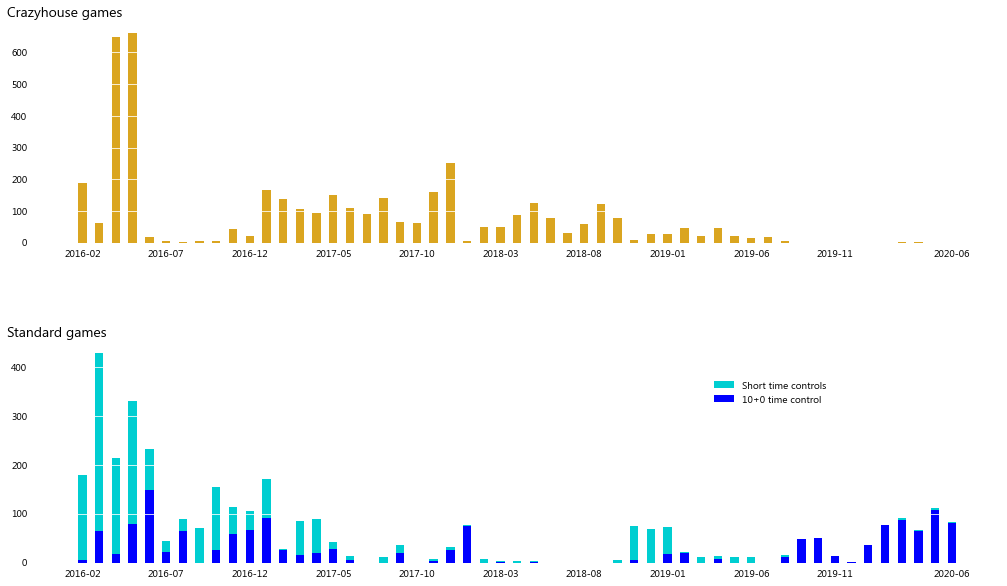

In [14]:
# sensible default visuals + emoji support
matplotlib.rc('axes', grid=True)
matplotlib.rc('axes.grid', axis="y")
matplotlib.rc('axes.spines', left=False, right=False, top=False, bottom=False)
matplotlib.rc('grid', color='white')
matplotlib.rc('legend', frameon=False)
matplotlib.rc('xtick', bottom=False)
matplotlib.rc('ytick', left=False)
matplotlib.rc('font', family='Segoe UI Emoji')

fig, ax = plt.subplots(2, figsize=(16,10))
fig.tight_layout(pad=8.0)

ax[0].bar(x_crazyhouse,y_crazyhouse, width=0.5, color="goldenrod")
ax[0].set_ylabel("Crazyhouse games", rotation=0, size=14, position=(0,1.01), horizontalalignment='left')
sparse_ticks(ax[0], 5)

ax[1].bar(x_standard,y_standard, width=0.5, color="darkturquoise", label='Short time controls')
ax[1].bar(x_standard,y_standard_10_min, width=0.5, color="blue", label='10+0 time control')
ax[1].set_ylabel("Standard games", rotation=0, size=14, position=(0,1.01), horizontalalignment='left')
ax[1].legend(loc=(0.7, 0.7))
sparse_ticks(ax[1], 5)

plt.show()

I started playing in February 2016. Around May or June I achieved my top ratings and after that played significantly less. In March 2019 I started on my first job and I believe that it dropped my baseline lower. Corona has probably increased my activity although I played a lot already in February 2020. I have also moved from playing short tournament games to longer games. 10+0 is my favorite time control so I have highlighted its proportion in standard games.

### Game result and time of date

In [9]:
def game_result_and_hour(games):
    """Returns three 24-long arrays, first for victories, second for draws
    and third for losses. Value at index i tells how many victories/draws/
    losses there were with games starting at hour i of day.
    """
    victories = 24 * [0]
    draws = 24 * [0]
    losses = 24 * [0]

    for i, game in enumerate(games):
        hour = int(game['UTCTime'].split(':')[0])
        if is_victory(game):
            victories[hour] += 1
        elif is_draw(game):
            draws[hour] += 1
        else:
            losses[hour] += 1
            
    return victories, draws, losses

In [10]:
crazyhouse_wins, crazyhouse_draws, crazyhouse_losses =\
    game_result_and_hour([game for game in games if game['Variant']=='Crazyhouse'])
standard_wins, standard_draws, standard_losses =\
    game_result_and_hour([game for game in games if game['Variant']=='Standard'])
standard_10_min_wins, standard_10_min_draws, standard_10_min_losses =\
    game_result_and_hour([game for game in games if game['Variant']=='Standard'
                          and game['TimeControl']=='600+0'])

In [11]:
def pretty_plot_wins_and_losses(ax, wins, losses, title):
    bar_width=0.4
    label_size=14
    alpha_value=0.4
    losses = [-x for x in losses]
    diff = [sum(x) for x in zip(wins, losses)]
    ax.bar(range(24), losses, width=bar_width, color="blue", alpha=alpha_value, label="losses")
    ax.bar(range(24), wins, width=bar_width, color="orange", alpha=alpha_value, label="wins")
    ax.bar(range(24), diff, width=bar_width, color="red", label="difference")
    ax.axhline(linewidth=0.4, xmin=0.05, xmax=0.95, color='black')
    ax.set_ylabel(title, rotation=0, size=label_size, position=(0,1.01), horizontalalignment='left')
    ax.set_xlabel("🕒", rotation=0, size=label_size, position=(0.5,0))
    ax.legend(loc=(0.05, 0.7))
    
    # remove "-" signs from yticklabels
    locsy = ax.get_yticks()
    
    def remove_prefix(s, prefix):
        return s[len(prefix):] if s.startswith(prefix) else s
    
    ax.set_yticklabels([remove_prefix(str(int(x)), "-") for x in locsy])
    
    locsx = range(0,24,4)
    ax.set_xticks(locsx)
    ax.set_xticklabels(locsx)

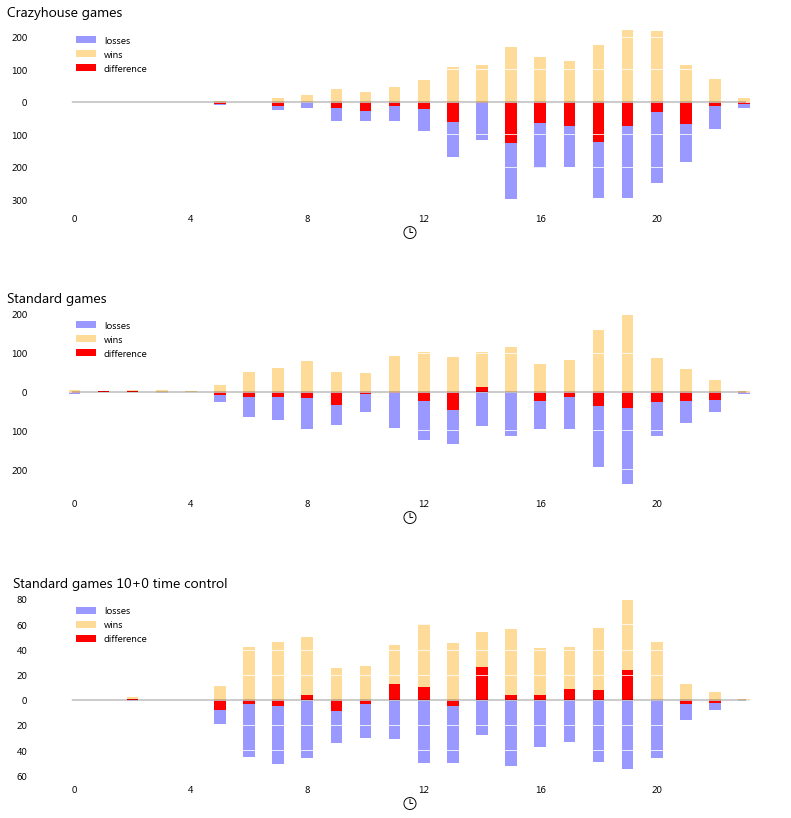

In [12]:
fig, ax = plt.subplots(3, figsize=(13,13))
fig.tight_layout(pad=8.0)

pretty_plot_wins_and_losses(ax[0], crazyhouse_wins, crazyhouse_losses, "Crazyhouse games")
pretty_plot_wins_and_losses(ax[1], standard_wins, standard_losses, "Standard games")
pretty_plot_wins_and_losses(ax[2], standard_10_min_wins, standard_10_min_losses, "Standard games 10+0 time control")

plt.show()

Interesting here is that my performance seem to be highest at around 14:00 which is visible both in Crazy house and Standard and especially with 10+0 time control. My best guess is that it is caused by my habit of drinking coffee at around that time.

## Predicting game outcome with logistic regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
y = # 1=win, 0=lose
x = # rating difference, two first moves, previous game, time of day, variant, time control,
# use one of k encoding
# - variant = {crazyhouse, standard, atomic, other}
# - previous game

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
logisticRegr.predict(x_test[0].reshape(1,-1))

## Predicting game outcome with Multilayer perceptron

### TODOs

- [ ] game result explained with rating difference
- [ ] weekdays vs weekend
- [ ] what explains victory (some kind of binary classification with logistic regression)
- [ ] different openings


- [] lik to https://lichess.org/@/aitotumainen/perf/rapid

In [ ]:
crazyhouse_win_rate = [crazyhouse_wins[i] / (crazyhouse_wins[i]+crazyhouse_draws[i]+crazyhouse_losses[i])\
    if crazyhouse_wins[i]+crazyhouse_draws[i]+crazyhouse_losses[i]\
    else float('nan')\
    for i in range(len(crazyhouse_wins))]
standard_win_rate = [standard_wins[i] / (standard_wins[i]+standard_draws[i]+standard_losses[i])\
    if standard_wins[i]+standard_draws[i]+standard_losses[i]\
    else float('nan')\
    for i in range(len(standard_wins))]

In [13]:
# rapid (10 min chess, win rate seems to stay same)
games_standard_rapid = [game for game in games if game['Variant'] == 'Standard' and game['TimeControl'] == '600+0']
rapid_wins, rapid_draws, rapid_losses = game_result_and_hour(games_standard_rapid)
rapid_win_rate = [rapid_wins[i] / (rapid_wins[i]+rapid_draws[i]+rapid_losses[i])\
    if rapid_wins[i]+rapid_draws[i]+rapid_losses[i]\
    else float('nan')\
    for i in range(len(zh_wins))
    ]

fig, axs = plt.subplots(2, figsize=(14,20))

axs[0].plot(rapid_wins)
axs[0].plot(rapid_losses)
axs[0].set_ylabel('Rapid standard')

axs[1].plot(range(len(rapid_wins)), rapid_win_rate, 'o')
axs[1].set_ylabel('Rapid win rate')

plt.show()

NameError: name 'zh_wins' is not defined